In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_classif

In [3]:
df = pd.read_csv('Titanic-Dataset.csv', index_col = "PassengerId")

In [4]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Data Analysis

Survival Rate by gender

In [8]:
stotal = df.groupby('Sex')['Survived'].transform('sum')
scount = df.groupby(['Sex', 'Survived']).size().reset_index(name='Count')
scount['Percentage'] = scount['Count'] / stotal * 100
sp = scount[scount['Survived'] == 1][['Sex', 'Percentage']]
sp

,Sex,Percentage
1,female,74.203822
3,male,18.890815


Gender shows to have a correlation with survival rate: Women have higher survival rates

Survival Rate by ticket class

In [14]:
# Calculate the number of passengers per Pclass
total_per_class = df.groupby('Pclass').size()

# Calculate the number of survivors per Pclass
survived_per_class = df[df['Survived'] == 1].groupby('Pclass').size()

# Calculate the survival rate as percentage
survival_rate = (survived_per_class / total_per_class * 100).reset_index(name='Percentage')
survival_rate

,Pclass,Percentage
0,1,62.962963
1,2,47.282609
2,3,24.236253


Ticket class shows to have a correlation with survival rate: Those with better seats have higher survival rates

Survival Rate by age

In [28]:
age = df.dropna(subset=['Age'])
bins = [0, 20, 40, age['Age'].max()]
labels = [1, 2, 3]
df.loc[:, 'AgeGroup'] = pd.cut(age['Age'], bins=bins, labels=labels, right=True)
total_per_age = age.groupby('AgeGroup', observed=True).size()

# Calculate the number of survivors per Pclass
survived_per_age = age[age['Survived'] == 1].groupby('AgeGroup', observed=True).size()

# Calculate the survival rate as percentage
survival_rate = (survived_per_age / total_per_age * 100).reset_index(name='Percentage')
survival_rate

,AgeGroup,Percentage
0,1,48.170732
1,2,38.759690
2,3,37.037037


Age shows to have a correlation with survival rate: Age group 1 have a higher survival rate

Survival Rate by number of siblings/spouses

In [34]:
bins = [0, 1, 2, df['SibSp'].max()]
labels = [1, 2, 3]
df['SibSpGroup'] = pd.cut(df['SibSp'], bins=bins, labels=labels, right=True, include_lowest=True)
total_per_sibsp = df.groupby('SibSpGroup', observed=True).size()

# Calculate the number of survivors per Pclass
survived_per_sibsp = df[df['Survived'] == 1].groupby('SibSpGroup', observed=True).size()

# Calculate the survival rate as percentage
survival_rate = (survived_per_sibsp / total_per_sibsp * 100).reset_index(name='Percentage')
survival_rate

,SibSpGroup,Percentage
0,1,39.412485
1,2,46.428571
2,3,15.217391


No correlation

Survival Rate by number of parents/children

In [39]:
total_per_parch = df.groupby('Parch', observed=True).size()
survived_per_parch = df[df['Survived'] == 1].groupby('Parch', observed=True).size()

# Calculate the survival rate as percentage
survival_rate = (survived_per_parch / total_per_parch * 100).reset_index(name='Percentage')
survival_rate

,Parch,Percentage
0,0,34.365782
1,1,55.084746
2,2,50.000000
3,3,60.000000
4,4,NaN
5,5,20.000000
6,6,NaN


Number of parents/children shows a correlation with survival rate: The greater the number, the higher the survival rate

Survival Rate by fare

In [36]:
bins = [0, 25,50, df['Fare'].max()+1]
labels = [1, 2, 3]
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
total_per_fare = df.groupby('FareGroup', observed=True).size()
survived_per_fare = df[df['Survived'] == 1].groupby('FareGroup', observed=True).size()

# Calculate the survival rate as percentage
survival_rate = (survived_per_fare / total_per_fare * 100).reset_index(name='Percentage')
survival_rate

,FareGroup,Percentage
0,1,28.725314
1,2,42.196532
2,3,67.701863


Fare shows a correlation with survival rate: Those that paid more had higher survival rates

Survival Rate by Embarked

In [32]:
total_per_embarked = df.groupby('Embarked', observed=True).size()
survived_per_embarked = df[df['Survived'] == 1].groupby('Embarked', observed=True).size()

# Calculate the survival rate as percentage
survival_rate = (survived_per_embarked / total_per_embarked * 100).reset_index(name='Percentage')
survival_rate

,Embarked,Percentage
0,C,55.357143
1,Q,38.961039
2,S,33.695652


Place of embarked shows a correlation with survival rate: Those that embarked from C show a higher survival rate

Data Cleaning

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         714 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Ticket      891 non-null    object  
 8   Fare        891 non-null    float64 
 9   Cabin       204 non-null    object  
 10  Embarked    889 non-null    object  
 11  AgeGroup    714 non-null    category
 12  SibSpGroup  891 non-null    category
 13  ParchGroup  891 non-null    category
 14  FareGroup   891 non-null    category
dtypes: category(4), float64(2), int64(4), object(5)
memory usage: 119.8+ KB


In [40]:
#Drop newly made groups because they are already numerical values
df.drop(columns = ['AgeGroup', 'SibSpGroup', 'ParchGroup', 'FareGroup'], inplace = True)

In [41]:
#Drop "Cabin" column because there are too many null values
df.drop(columns = ['Cabin'], inplace = True)

In [42]:
#Drop "Ticket" and "Name" columns because they are individual unique values
df.drop(columns = ['Name', 'Ticket'], inplace = True)

177 missing values for 'Age' column

In [43]:
miss = df[df['Age'].isna()]

In [44]:
miss.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000


In [45]:
notmiss = df.dropna(subset=['Age'])
notmiss.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


'Age' column missing values is likely correlated with survival rate or fare -> Missing at random

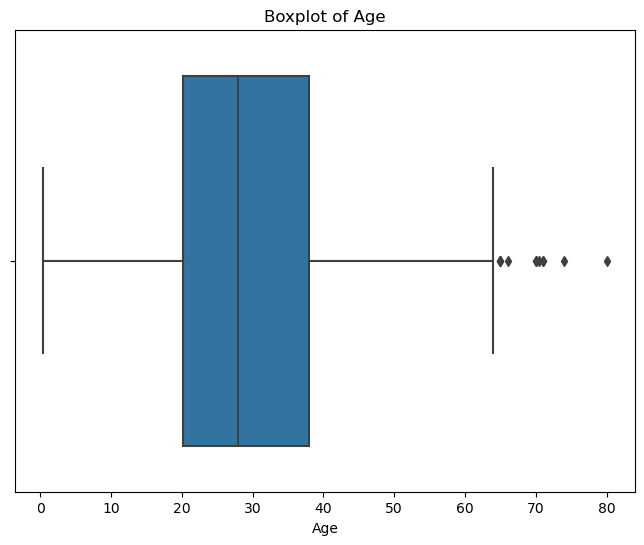

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

Median Imputation Method

In [47]:
median_age = notmiss['Age'].median()
df['Age'].fillna(median_age, inplace=True)

Mode Imputation Method

In [48]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

Change "Sex" and "Embarked" into numerical values

In [49]:
df["Sex"] = df["Sex"].map({"male":1,"female":0})
df["Embarked"] = df["Embarked"].map({"S":0,"C":1,"Q":2})

In [50]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


In [51]:
X = df.drop('Survived', axis=1)
y = df['Survived']
selector = SelectKBest(f_classif, k=7)
X_new = selector.fit_transform(X, y)
scores = selector.scores_
p_values = selector.pvalues_
selected_indices = selector.get_support(indices=True)
for i, feature in enumerate(X.columns):
    print(f"Feature '{feature}':\t Score={scores[i]:.2f}, p-value={p_values[i]:.4f}")

Feature 'Pclass':	 Score=115.03, p-value=0.0000
Feature 'Sex':	 Score=372.41, p-value=0.0000
Feature 'Age':	 Score=3.76, p-value=0.0528
Feature 'SibSp':	 Score=1.11, p-value=0.2922
Feature 'Parch':	 Score=5.96, p-value=0.0148
Feature 'Fare':	 Score=63.03, p-value=0.0000
Feature 'Embarked':	 Score=10.26, p-value=0.0014


Both tests indicate that "SibSp" is not highly relevant

In [52]:
df.drop(columns = ['SibSp'], inplace = True)

Predictive Modeling

In [53]:
X = df.drop('Survived', axis=1)
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 30)

In [54]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Mean Squared Error: {mse:.2f}')

Accuracy: 0.79
Mean Squared Error: 0.21
